In [1]:
%load_ext autoreload
%autoreload 2
from parse_grid_data import parse_grid_data_new
from analysis_grid_data import cal_sipm_iv_vbr_data, plot_iv_vbr_curve

from addict import Dict
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# IV

In [4]:
filename = r'data/031_0_Cs137_observe.dat'

data_iv = Dict(parse_grid_data_new(filename,data_tag='iv_packet',endian='MSB')[0])
data_vbr = Dict(parse_grid_data_new(filename,data_tag='vbr_packet',endian='MSB')[0])
plot_iv_vbr_curve(cal_sipm_iv_vbr_data(data_iv.iv,scan_type='iv'),cal_sipm_iv_vbr_data(data_vbr.vbr,scan_type='vbr'))

========> parsing file  data/031_0_Cs137_observe.dat


FileNotFoundError: [Errno 2] No such file or directory: 'data/031_0_Cs137_observe.dat'

# WF

In [44]:
wf_data_l = Dict(parse_grid_data_new(r'/Users/binkaiqi/Downloads/能量道址实验/能量道址实验——1.15/数据/192_Co60_15min_ch3_observe.dat',data_tag='grid1x_wf_packet',endian='MSB')[0])
# wf_data_l.data = wf_data_l.data.astype(np.int16)

========> parsing file  /Users/binkaiqi/Downloads/能量道址实验/能量道址实验——1.15/数据/192_Co60_15min_ch3_observe.dat
header
utc
pps_for_utc
timestamp_for_pps
channel_n
event_number
sample_length
waveform_data
timestamp
data_max
data_base
CRC
tail
                 name  start  size  len
0              header      0     4    1
1                 utc      4     4    1
2         pps_for_utc      8     4    1
3   timestamp_for_pps     12     8    1
4           channel_n     20     2    1
5        event_number     22     4    1
6       sample_length     26     2    1
7       waveform_data     28     2  256
8           timestamp    540     8    1
9            data_max    548     2    1
10          data_base    550     2    1
11                CRC    554     2    1
12               tail    556     4    1


ch0 count: 0
ch1 count: 0
ch2 count: 0
ch3 count: 181360


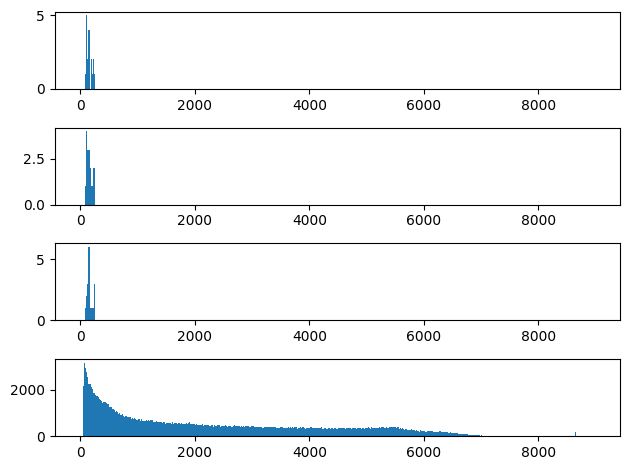

In [45]:
# Spectrum plotting code by PXF
bin_width = 20
range_min = 0
range_max = 9000

bins = range(range_min, range_max, bin_width)

fig,axs = plt.subplots(4)
counts0, bins, patches = axs[0].hist(wf_data_l.data_max[wf_data_l.channel_n==0][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts1, bins, patches = axs[1].hist(wf_data_l.data_max[wf_data_l.channel_n==1][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts2, bins, patches = axs[2].hist(wf_data_l.data_max[wf_data_l.channel_n==2][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts3, bins, patches = axs[3].hist(wf_data_l.data_max[wf_data_l.channel_n==3][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)

# axs[0].set_xlim(0,1000)
# axs[1].set_xlim(0,1000)
# axs[2].set_xlim(0,1000)
# axs[3].set_xlim(0,1000)

#axs[0].set_ylim(0,2000)
#axs[1].set_ylim(0,2000)
#axs[2].set_ylim(0,2000)
#axs[3].set_ylim(0,200)

plt.tight_layout()
print('ch0 count: {:d}'.format(int(sum(counts0[150//4:425//4]))))
print('ch1 count: {:d}'.format(int(sum(counts1[130//4:405//4]))))
print('ch2 count: {:d}'.format(int(sum(counts2[135//4:410//4]))))
print('ch3 count: {:d}'.format(int(sum(counts3[:]))))
#计数

In [46]:
wf_data_l.keys()

dict_keys(['header', 'utc', 'pps_for_utc', 'timestamp_for_pps', 'channel_n', 'event_number', 'sample_length', 'waveform_data', 'timestamp', 'data_max', 'data_base', 'CRC', 'crc_check', 'tail'])

In [47]:
wf_data_l.waveform_data.shape

(181416, 256)

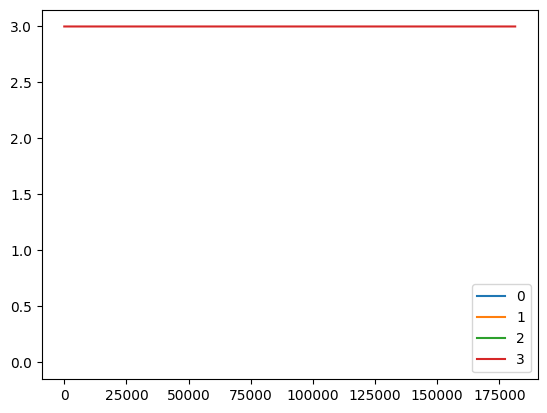

In [48]:

plt.plot(wf_data_l.channel_n[wf_data_l.channel_n==0][:])
plt.plot(wf_data_l.channel_n[wf_data_l.channel_n==1][:])
plt.plot(wf_data_l.channel_n[wf_data_l.channel_n==2][:])
plt.plot(wf_data_l.channel_n[wf_data_l.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

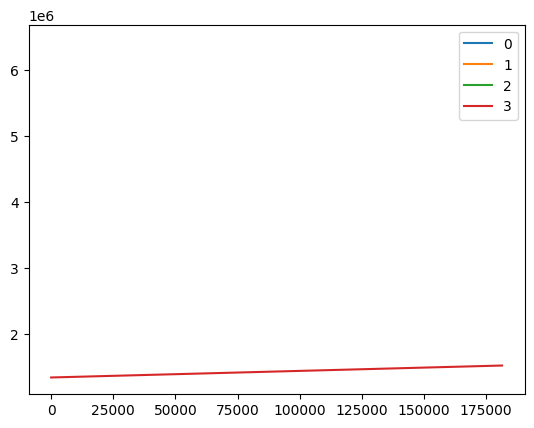

In [49]:

plt.plot(wf_data_l.event_number[wf_data_l.channel_n==0][:])
plt.plot(wf_data_l.event_number[wf_data_l.channel_n==1][:])
plt.plot(wf_data_l.event_number[wf_data_l.channel_n==2][:])
plt.plot(wf_data_l.event_number[wf_data_l.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

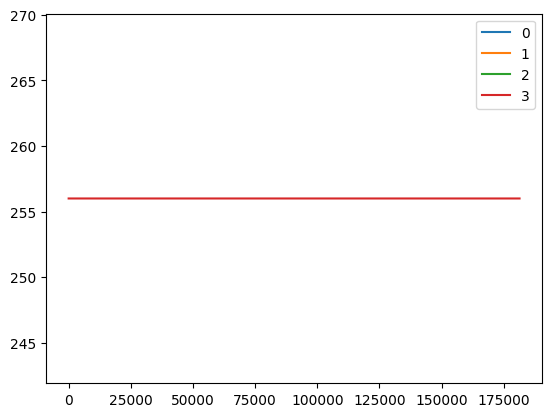

In [50]:

plt.plot(wf_data_l.sample_length[wf_data_l.channel_n==0][:])
plt.plot(wf_data_l.sample_length[wf_data_l.channel_n==1][:])
plt.plot(wf_data_l.sample_length[wf_data_l.channel_n==2][:])
plt.plot(wf_data_l.sample_length[wf_data_l.channel_n==3][:])

plt.legend([0,1,2,3])
plt.show()

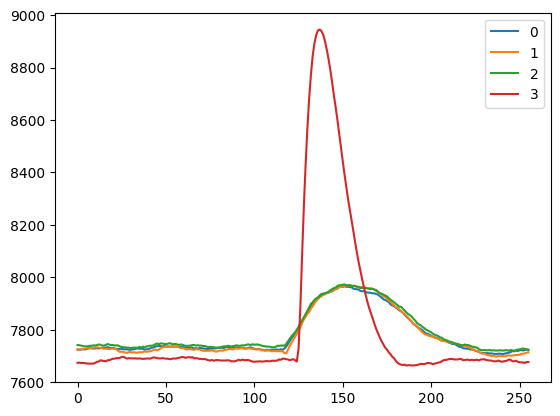

In [51]:
plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==0].T[:,2])
plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==1].T[:,2])
plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==2].T[:,2])
plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==3].T[:,2])
# plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==0].flatten())
# plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==1].flatten())
# plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==2].flatten())
# plt.plot(wf_data_l.waveform_data[wf_data_l.channel_n==3].flatten())



plt.legend([0,1,2,3])
plt.show()

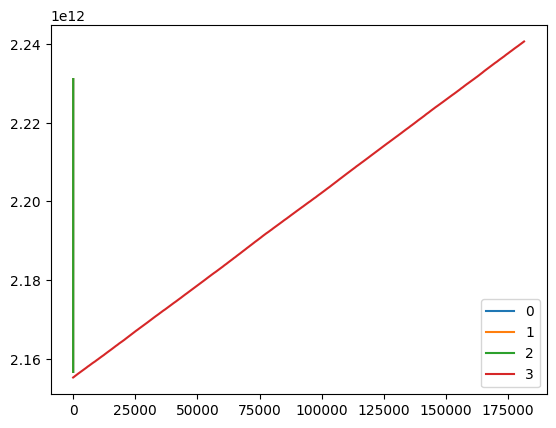

AttributeError: `ptp` was removed from the ndarray class in NumPy 2.0. Use np.ptp(arr, ...) instead.

In [52]:

plt.plot(wf_data_l.timestamp[wf_data_l.channel_n==0][:])
plt.plot(wf_data_l.timestamp[wf_data_l.channel_n==1][:])
plt.plot(wf_data_l.timestamp[wf_data_l.channel_n==2][:])
plt.plot(wf_data_l.timestamp[wf_data_l.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()
#measuring time code by QBK
timestamp = wf_data_l.timestamp
# 计算最大值与最小值之差
print('测量时间为\n', (timestamp.ptp())/100000000)

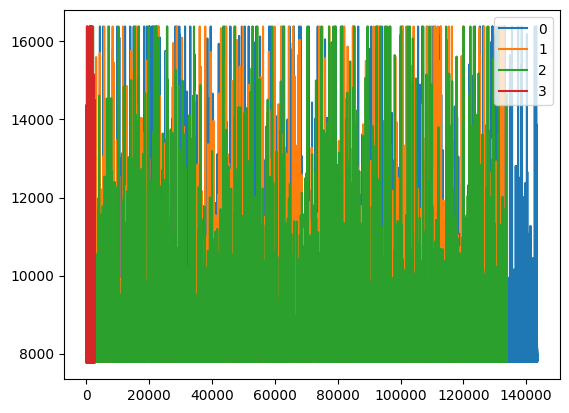

In [364]:
plt.plot(wf_data_l.data_max[wf_data_l.channel_n==0][:])
plt.plot(wf_data_l.data_max[wf_data_l.channel_n==1][:])
plt.plot(wf_data_l.data_max[wf_data_l.channel_n==2][:])
plt.plot(wf_data_l.data_max[wf_data_l.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

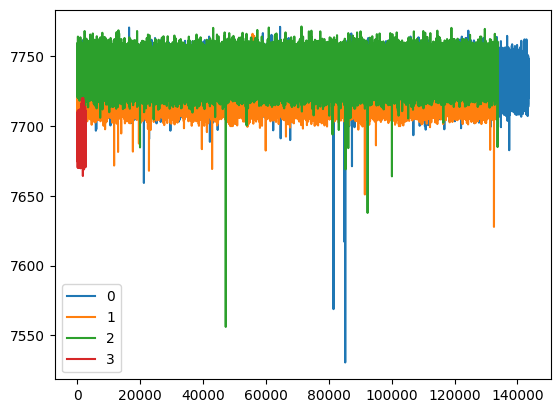

In [365]:
plt.plot(wf_data_l.data_base[wf_data_l.channel_n==0][:]/4)
plt.plot(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4)
plt.plot(wf_data_l.data_base[wf_data_l.channel_n==2][:]/4)
plt.plot(wf_data_l.data_base[wf_data_l.channel_n==3][:]/4)
plt.legend([0,1,2,3])
plt.show()

In [366]:
wf_data_l.keys()

dict_keys(['header', 'utc', 'pps_for_utc', 'timestamp_for_pps', 'channel_n', 'event_number', 'sample_length', 'waveform_data', 'timestamp', 'data_max', 'data_base', 'CRC', 'crc_check', 'tail'])

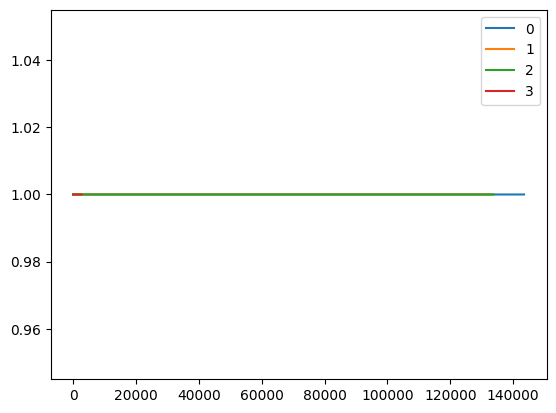

In [367]:
plt.plot(wf_data_l.crc_check[wf_data_l.channel_n==0][:])
plt.plot(wf_data_l.crc_check[wf_data_l.channel_n==1][:])
plt.plot(wf_data_l.crc_check[wf_data_l.channel_n==2][:])
plt.plot(wf_data_l.crc_check[wf_data_l.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

# InFO

In [368]:
wf_data_h = Dict(parse_grid_data_new(r'10B_en_29/sample/021_observe.dat',data_tag='grid1x_ft_packet',endian='MSB')[0],multi_evt=41, multi_step=12)

========> parsing file  10B_en_29/sample/021_observe.dat


FileNotFoundError: [Errno 2] No such file or directory: '10B_en_29/sample/021_observe.dat'

In [ ]:
wf_data_h.data_max.shape

NameError: name 'wf_data_h' is not defined

In [ ]:
wf_data_h.keys()

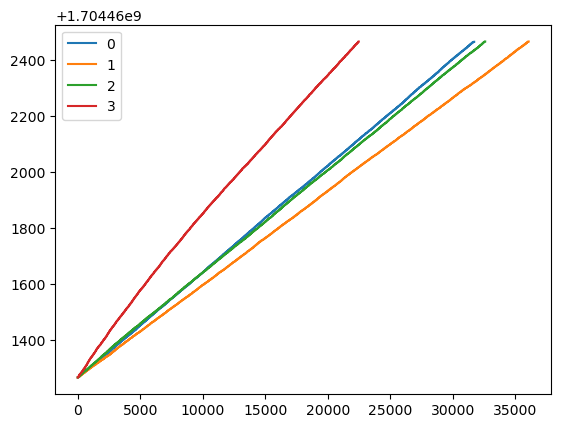

In [ ]:
plt.plot(wf_data_h.utc[wf_data_h.channel_n==0][:])
plt.plot(wf_data_h.utc[wf_data_h.channel_n==1][:])
plt.plot(wf_data_h.utc[wf_data_h.channel_n==2][:])
plt.plot(wf_data_h.utc[wf_data_h.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

In [ ]:
plt.plot(wf_data_h.channel_n[wf_data_h.channel_n==0][:])
plt.plot(wf_data_h.channel_n[wf_data_h.channel_n==1][:])
plt.plot(wf_data_h.channel_n[wf_data_h.channel_n==2][:])
plt.plot(wf_data_h.channel_n[wf_data_h.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

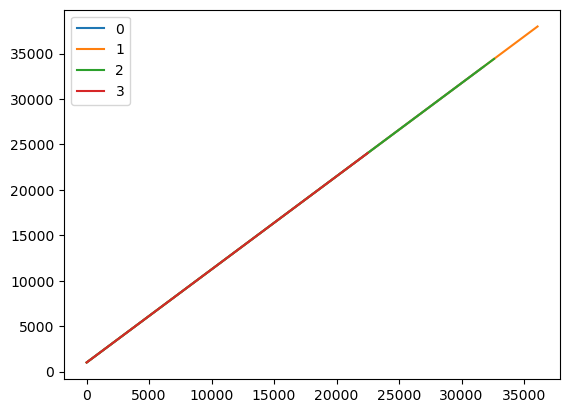

In [ ]:
plt.plot(wf_data_h.event_number[wf_data_h.channel_n==0][:])
plt.plot(wf_data_h.event_number[wf_data_h.channel_n==1][:])
plt.plot(wf_data_h.event_number[wf_data_h.channel_n==2][:])
plt.plot(wf_data_h.event_number[wf_data_h.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

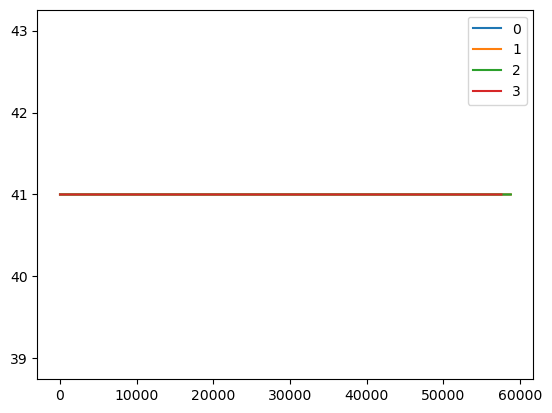

In [ ]:
plt.plot(wf_data_h.pkg_event_num[wf_data_h.channel_n==0][:])
plt.plot(wf_data_h.pkg_event_num[wf_data_h.channel_n==1][:])
plt.plot(wf_data_h.pkg_event_num[wf_data_h.channel_n==2][:])
plt.plot(wf_data_h.pkg_event_num[wf_data_h.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

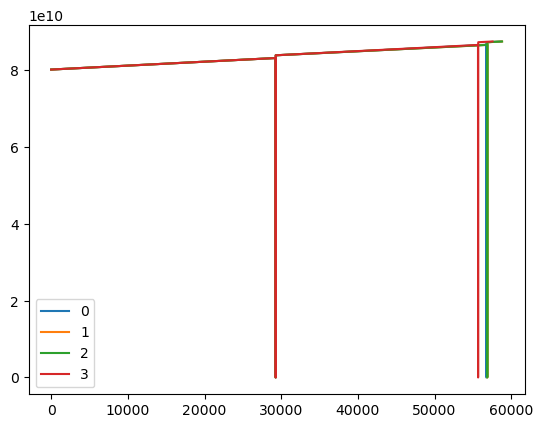

In [ ]:
plt.plot(wf_data_h.timestamp[wf_data_h.channel_n==0][:])
plt.plot(wf_data_h.timestamp[wf_data_h.channel_n==1][:])
plt.plot(wf_data_h.timestamp[wf_data_h.channel_n==2][:])
plt.plot(wf_data_h.timestamp[wf_data_h.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

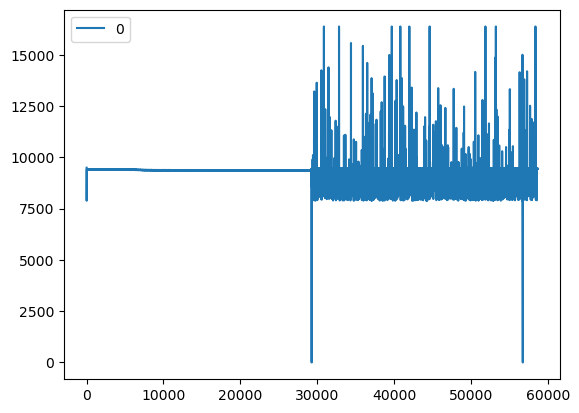

In [ ]:
plt.plot(wf_data_h.data_max[wf_data_h.channel_n==0][:])
# plt.plot(wf_data_h.data_max[wf_data_h.channel_n==1][:])
# plt.plot(wf_data_h.data_max[wf_data_h.channel_n==2][:])
# plt.plot(wf_data_h.data_max[wf_data_h.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

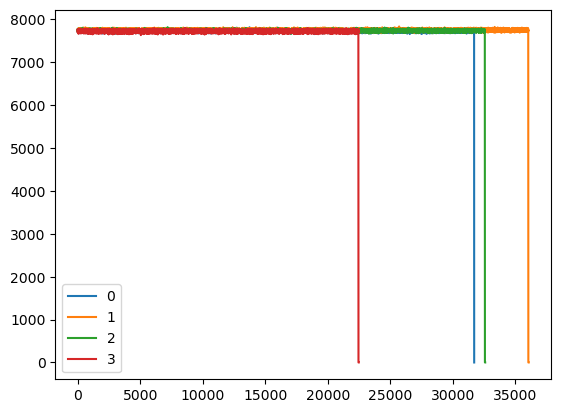

In [ ]:


plt.plot(wf_data_h.data_base[wf_data_h.channel_n==0][:]/4)
plt.plot(wf_data_h.data_base[wf_data_h.channel_n==1][:]/4)
plt.plot(wf_data_h.data_base[wf_data_h.channel_n==2][:]/4)
plt.plot(wf_data_h.data_base[wf_data_h.channel_n==3][:]/4)
plt.legend([0,1,2,3])
plt.show()

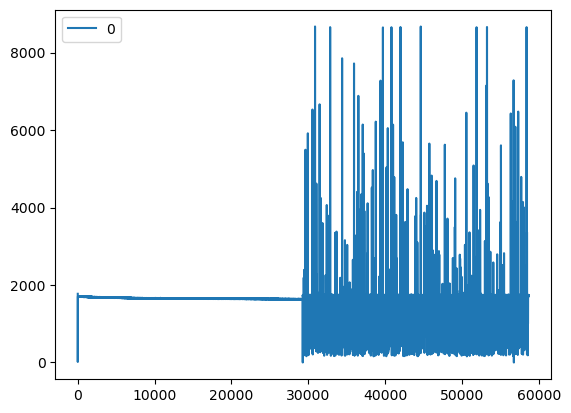

In [ ]:
plt.plot(wf_data_h.data_max[wf_data_h.channel_n==0][:] - wf_data_h.data_base[wf_data_h.channel_n==0][:]/4)
# plt.plot(wf_data_h.data_max[wf_data_h.channel_n==1][:] - wf_data_h.data_base[wf_data_h.channel_n==1][:]/4)
# plt.plot(wf_data_h.data_max[wf_data_h.channel_n==2][:] - wf_data_h.data_base[wf_data_h.channel_n==2][:]/4)
# plt.plot(wf_data_h.data_max[wf_data_h.channel_n==3][:] - wf_data_h.data_base[wf_data_h.channel_n==3][:]/4)
plt.legend([0,1,2,3])
plt.show()

In [ ]:
max(wf_data_h.data_max[wf_data_h.channel_n==0][:] - wf_data_h.data_base[wf_data_h.channel_n==0][:]/4)

8710.5

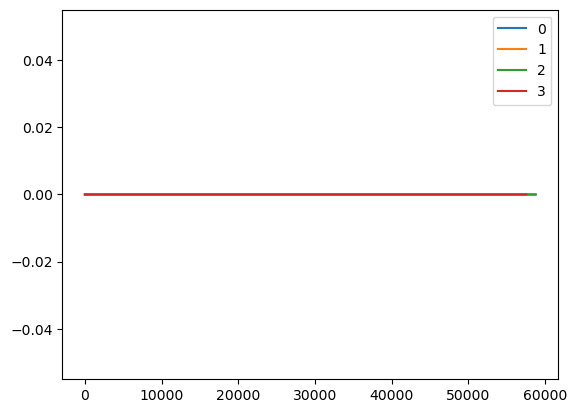

In [ ]:
plt.plot(wf_data_h.crc_check[wf_data_h.channel_n==0][:])
plt.plot(wf_data_h.crc_check[wf_data_h.channel_n==1][:])
plt.plot(wf_data_h.crc_check[wf_data_h.channel_n==2][:])
plt.plot(wf_data_h.crc_check[wf_data_h.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

In [ ]:
es_data = Dict(parse_grid_data_new(r'222_energy.dat',data_tag='grid1x_es_packet',endian='MSB')[0])


In [ ]:
es_data.l_energy_data[es_data.channel_n==3][0]

In [ ]:
# plt.plot(es_data.l_energy_data[es_data.channel_n==0].T)
# plt.plot(es_data.l_energy_data[es_data.channel_n==1][:])
# plt.plot(es_data.l_energy_data[es_data.channel_n==2][:])
plt.plot(es_data.l_energy_data[es_data.channel_n==3][:])
# plt.legend([0,1,2,3])
plt.show()

In [ ]:
es_data.s_energy_data.shape

In [ ]:
bins = np.array([0,10,15,30,40,50,60,90,100])
x = np.diff(bins)/2 + bins[:-1]
plt.plot(x,es_data.s_energy_data[es_data.channel_n==0].reshape(-1,20,8)[0].T, '.')



In [ ]:
es_data.keys()


In [ ]:
plt.plot(es_data.s_energy_data[es_data.channel_n==0][1:3])
# plt.plot(es_data.s_energy_data[es_data.channel_n==1][:])
# plt.plot(es_data.s_energy_data[es_data.channel_n==2][:])
# plt.plot(es_data.s_energy_data[es_data.channel_n==3][:])
# plt.legend([0,1,2,3])
plt.show()

In [ ]:
es_data.s_energy_data[es_data.channel_n==0][1]

In [ ]:
plt.plot(es_data.crc_check[es_data.channel_n==0][:])
plt.plot(es_data.crc_check[es_data.channel_n==1][:])
plt.plot(es_data.crc_check[es_data.channel_n==2][:])
plt.plot(es_data.crc_check[es_data.channel_n==3][:])
plt.legend([0,1,2,3])
plt.show()

NameError: name 'es_data' is not defined

# HK

In [ ]:
hk_data = Dict(parse_grid_data_new(r'角响应/侧立_Am241_逆时针/158_330_Cs_hk.dat',data_tag='hk_grid1x_packet',endian='MSB')[0])

========> parsing file  角响应/侧立_Am241_逆时针/158_330_Cs_hk.dat
header
utc_time
cpu_temperature
daq_temperature_i2c1_0x49
latest_received_cmd
latest_received_cmd_arg
latest_received_cmd_index
current_cmd_progress
latest_complete_cmd
latest_complete_cmd_arg
latest_complete_cmd_exit
latest_complete_cmd_duration
file_upload_progress
file_upload_check
telemetry_count
cmd_count
storage_valid
memory_valid
pl_version
app_version
log_index
sci_data_index
data_stream_status
qspi_normal_or_backup
fee_z5v_v
fee_z5v_i
fee_z2v1_v
fee_z2v1_i
fee_z5v4_v
fee_z5v4_i
fee_z5vA_v
fee_z5vA_i
fee_5vA_v
fee_5vA_i
fee_1v8a_v
fee_1v8a_i
fee_3v3_v
fee_3v3_i
fee_1v8d_v
fee_1v8d_i
fee_p5va1_v
fee_p5va1_i
fee_p5va2_v
fee_p5va2_i
fee_p5va3_v
fee_p5va3_i
fee_p5va4_v
fee_p5va4_i
daq_1v0_v
daq_1v0_i
daq_1v8_v
daq_1v8_i
daq_2v5_v
daq_2v5_i
daq_3v3_v
daq_3v3_i
daq_1v5_v
daq_1v5_i
sipm_voltage0
sipm_current0
sipm_temp0
sipm_voltage1
sipm_current1
sipm_temp1
sipm_voltage2
sipm_current2
sipm_temp2
sipm_voltage3
sipm_current3
si

In [ ]:
hk_data.keys()

dict_keys(['header', 'utc_time', 'cpu_temperature', 'daq_temperature_i2c1_0x49', 'latest_received_cmd', 'latest_received_cmd_arg', 'latest_received_cmd_index', 'current_cmd_progress', 'latest_complete_cmd', 'latest_complete_cmd_arg', 'latest_complete_cmd_exit', 'latest_complete_cmd_duration', 'file_upload_progress', 'file_upload_check', 'telemetry_count', 'cmd_count', 'storage_valid', 'memory_valid', 'pl_version', 'app_version', 'log_index', 'sci_data_index', 'data_stream_status', 'qspi_normal_or_backup', 'fee_z5v_v', 'fee_z5v_i', 'fee_z2v1_v', 'fee_z2v1_i', 'fee_z5v4_v', 'fee_z5v4_i', 'fee_z5vA_v', 'fee_z5vA_i', 'fee_5vA_v', 'fee_5vA_i', 'fee_1v8a_v', 'fee_1v8a_i', 'fee_3v3_v', 'fee_3v3_i', 'fee_1v8d_v', 'fee_1v8d_i', 'fee_p5va1_v', 'fee_p5va1_i', 'fee_p5va2_v', 'fee_p5va2_i', 'fee_p5va3_v', 'fee_p5va3_i', 'fee_p5va4_v', 'fee_p5va4_i', 'daq_1v0_v', 'daq_1v0_i', 'daq_1v8_v', 'daq_1v8_i', 'daq_2v5_v', 'daq_2v5_i', 'daq_3v3_v', 'daq_3v3_i', 'daq_1v5_v', 'daq_1v5_i', 'sipm_voltage0', 'sip

In [ ]:
hk_data.crc_check

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

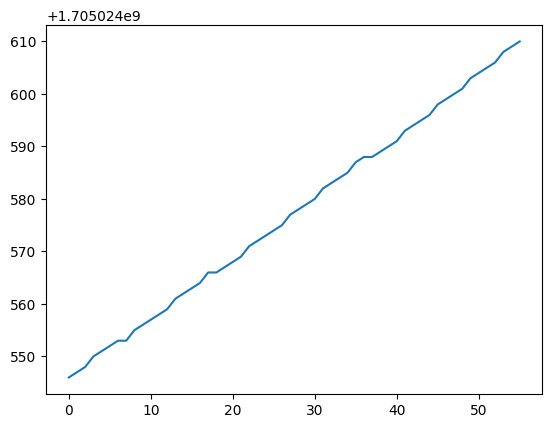

In [ ]:
plt.plot(hk_data.utc_time[100:])
plt.show()

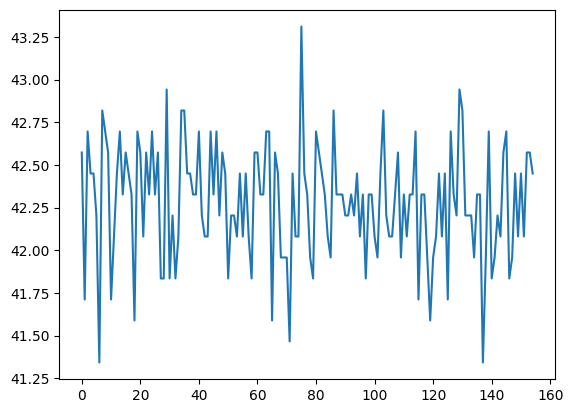

In [ ]:
plt.plot(hk_data.cpu_temperature[1:]*503.975/4096 - 273.15)
plt.show()

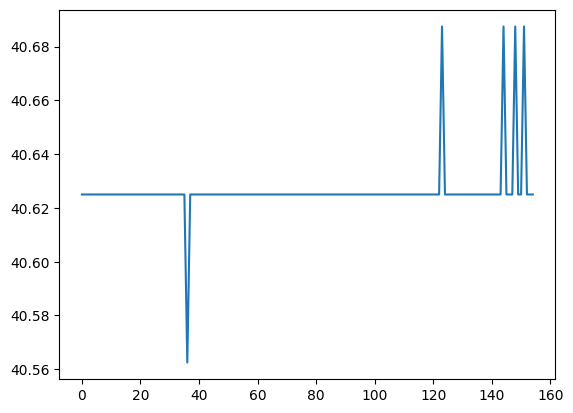

In [ ]:
temp = hk_data.daq_temperature_i2c1_0x49/16/16
for i in range(1,temp.size) :
    if temp[i]>128 :
        temp[i] = temp[i]-255    

plt.plot(temp[1:])
# plt.plot(hk_data.daq_temperature_i2c1_0x49/16/16)
plt.show()

In [ ]:
hk_data.daq_temperature_i2c1_0x49


array([10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10384, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400, 10400,
       10400, 10400, 10400, 10400, 10400, 10400, 10400, 10416, 10400,
       10400, 10400,

In [ ]:
hk_data.keys()

dict_keys(['header', 'utc_time', 'cpu_temperature', 'daq_temperature_i2c1_0x49', 'latest_received_cmd', 'latest_received_cmd_arg', 'latest_received_cmd_index', 'current_cmd_progress', 'latest_complete_cmd', 'latest_complete_cmd_arg', 'latest_complete_cmd_exit', 'latest_complete_cmd_duration', 'file_upload_progress', 'file_upload_check', 'telemetry_count', 'cmd_count', 'storage_valid', 'memory_valid', 'pl_version', 'app_version', 'log_index', 'sci_data_index', 'data_stream_status', 'qspi_normal_or_backup', 'fee_z5v_v', 'fee_z5v_i', 'fee_z2v1_v', 'fee_z2v1_i', 'fee_z5v4_v', 'fee_z5v4_i', 'fee_z5vA_v', 'fee_z5vA_i', 'fee_5vA_v', 'fee_5vA_i', 'fee_1v8a_v', 'fee_1v8a_i', 'fee_3v3_v', 'fee_3v3_i', 'fee_1v8d_v', 'fee_1v8d_i', 'fee_p5va1_v', 'fee_p5va1_i', 'fee_p5va2_v', 'fee_p5va2_i', 'fee_p5va3_v', 'fee_p5va3_i', 'fee_p5va4_v', 'fee_p5va4_i', 'daq_1v0_v', 'daq_1v0_i', 'daq_1v8_v', 'daq_1v8_i', 'daq_2v5_v', 'daq_2v5_i', 'daq_3v3_v', 'daq_3v3_i', 'daq_1v5_v', 'daq_1v5_i', 'sipm_voltage0', 'sip

In [ ]:
hk_data.latest_received_cmd

array([ 0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 36,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 32,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 65,  2,
        2,  2,  2], dtype=uint32)

In [ ]:
hk_data.latest_received_cmd_arg

array([        0,  64000426,  64000428,  64000429,  64000430,  64000431,
        64000432,  64000434,  64000435,  64000436,  64000437,  64000439,
        64000440,  64000441, 252170240,  64000444,  64000445,  64000446,
        64000447,  64000448,  64000450,  64000451,  64000452,  64000453,
        64000455,  64000456,  64000457,  64000458,  64000460,  64000461,
        64000462,  64000463,  64000465,  64000466,  64000467,  64000468,
        64000469,  64000471,  64000472,  64000473,  64000474,  64000476,
        64000477,  64000478, 251658496,  64000481,  64000482,  64000483,
        64000484,  64000486,  64000487,  64000488,  64000489,  64000490,
        64000492,  64000493,  64000494,  64000495,  64000497,  64000498,
        64000499,  64000500,  64000502,  64000503,  64000504,  64000505,
        64000506,  64000508,  64000509,  64000510,  64000511,  64000511,
        64000513,  64000514,  64000515,  64000516,  64000518,  64000519,
        64000520,  64000521,  64000522,  64000524, 

In [ ]:
hk_data.latest_received_cmd_index

array([[  0,   0],
       [  0,   2],
       [  0,   6],
       [  0,   8],
       [  0,  10],
       [  0,  12],
       [  0,  14],
       [  0,  19],
       [  0,  21],
       [  0,  23],
       [  0,  25],
       [  0,  29],
       [  0,  31],
       [  0,  33],
       [  0,  36],
       [  0,  40],
       [  0,  42],
       [  0,  44],
       [  0,  46],
       [  0,  48],
       [  0,  52],
       [  0,  54],
       [  0,  56],
       [  0,  58],
       [  0,  62],
       [  0,  64],
       [  0,  67],
       [  0,  69],
       [  0,  73],
       [  0,  76],
       [  0,  78],
       [  0,  80],
       [  0,  85],
       [  0,  87],
       [  0,  89],
       [  0,  91],
       [  0,  93],
       [  0,  98],
       [  0, 100],
       [  0, 102],
       [  0, 104],
       [  0, 108],
       [  0, 110],
       [  0, 112],
       [  0, 115],
       [  0, 119],
       [  0, 121],
       [  0, 123],
       [  0, 125],
       [  0, 129],
       [  0, 131],
       [  0, 133],
       [  0,

In [ ]:
hk_data.current_cmd_progress

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)

In [ ]:
hk_data.latest_complete_cmd

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1, 64,  1,  1,  1, 36,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 32,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 65,  1,
        2,  1,  1], dtype=uint32)

In [ ]:
hk_data.latest_complete_cmd_arg

array([         0,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
       1073741824,   16777216,   16777216,   16777216,  604964816,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,  537853953,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777216,
         16777216,   16777216,   16777216,   16777216,   16777

In [ ]:
hk_data.latest_complete_cmd_exit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)

In [ ]:
hk_data.latest_complete_cmd_duration


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 338,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0,   0,   0,   0,   0,   1,   1,   0, 548,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint32)

In [ ]:
hk_data.file_upload_progress

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)

In [ ]:
hk_data.file_upload_check

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)

In [ ]:
hk_data.telemetry_count

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)

In [ ]:
hk_data.cmd_count

array([  0,   2,   6,   8,  10,  12,  14,  19,  21,  23,  25,  29,  31,
        33,  36,  40,  42,  44,  46,  48,  52,  54,  56,  58,  62,  64,
        67,  69,  73,  76,  78,  80,  85,  87,  89,  91,  93,  98, 100,
       102, 104, 108, 110, 112, 115, 119, 121, 123, 125, 129, 131, 133,
       135, 137, 141, 143, 145, 147, 151, 153, 155, 157, 161, 163, 165,
       167, 169, 173, 175, 177, 179, 179, 183, 185, 187, 189, 193, 195,
       197, 199, 201, 205, 207, 209, 211, 215, 217, 219, 221, 225, 227,
       229, 229, 231, 235, 237, 239, 241, 243, 247, 249, 251, 253, 257,
       259, 261, 263, 263, 267, 269, 271, 273, 275, 279, 281, 283, 285,
       289, 289, 291, 293, 295, 299, 301, 303, 305, 307, 311, 313, 315,
       317, 321, 323, 325, 327, 331, 333, 333, 335, 337, 339, 343, 345,
       347, 349, 353, 355, 358, 360, 364, 366, 369, 371, 375, 377, 379],
      dtype=uint32)

In [ ]:
hk_data.storage_valid

array([24680, 24680, 24680, 24680, 24680, 24680, 24680, 24680, 24680,
       24680, 24680, 24680, 24680, 24679, 24679, 24679, 24679, 24679,
       24679, 24679, 24679, 24679, 24679, 24679, 24679, 24679, 24679,
       24679, 24679, 24679, 24679, 24679, 24679, 24679, 24679, 24679,
       24679, 24679, 24679, 24679, 24679, 24679, 24679, 24679, 24679,
       24679, 24679, 24679, 24679, 24679, 24679, 24678, 24678, 24678,
       24677, 24677, 24677, 24676, 24676, 24676, 24675, 24675, 24675,
       24674, 24674, 24674, 24673, 24673, 24673, 24672, 24672, 24672,
       24672, 24671, 24671, 24671, 24670, 24670, 24670, 24670, 24669,
       24669, 24669, 24668, 24668, 24668, 24667, 24667, 24667, 24666,
       24666, 24666, 24666, 24665, 24665, 24665, 24664, 24664, 24664,
       24663, 24663, 24663, 24662, 24662, 24662, 24661, 24661, 24661,
       24661, 24660, 24660, 24660, 24660, 24659, 24659, 24659, 24658,
       24658, 24658, 24658, 24657, 24657, 24657, 24656, 24656, 24656,
       24655, 24655,

In [ ]:
hk_data.memory_valid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)

In [ ]:
hk_data.pl_version

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint32)

In [ ]:
hk_data.app_version

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint32)

In [ ]:
hk_data.sci_data_index

array([53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54], dtype=uint32)

In [ ]:
hk_data.data_stream_status

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)

In [ ]:
hk_data.qspi_normal_or_backup

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint32)

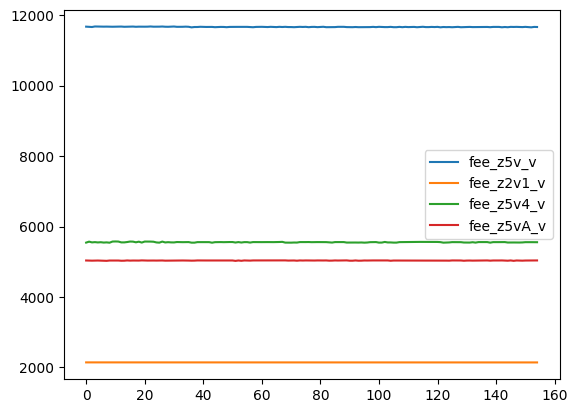

In [ ]:
plt.plot(hk_data.fee_z5v_v[1:]*1.25)
plt.plot(hk_data.fee_z2v1_v[1:]*1.25)
plt.plot(hk_data.fee_z5v4_v[1:]*1.25)
plt.plot(hk_data.fee_z5vA_v[1:]*1.25)
plt.legend(['fee_z5v_v','fee_z2v1_v','fee_z5v4_v','fee_z5vA_v'])
plt.show()

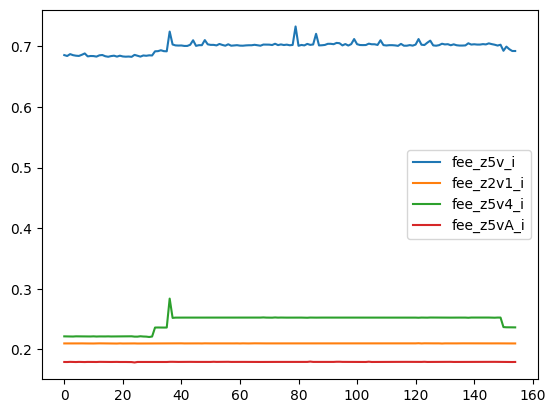

In [ ]:
plt.plot(hk_data.fee_z5v_i[1:]*2.5/0.02/1e6)
plt.plot(hk_data.fee_z2v1_i[1:]*2.5/0.12/1e6)
plt.plot(hk_data.fee_z5v4_i[1:]*2.5/0.12/1e6)
plt.plot(hk_data.fee_z5vA_i[1:]*2.5/0.12/1e6)
plt.legend(['fee_z5v_i','fee_z2v1_i','fee_z5v4_i','fee_z5vA_i'])
plt.show()

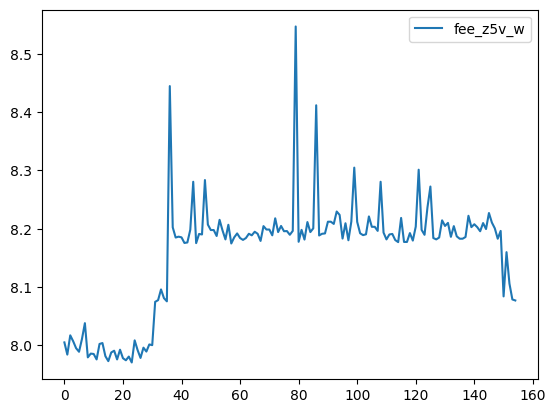

In [ ]:
plt.plot((hk_data.fee_z5v_i[1:]*2.5/0.02/1e6)*(hk_data.fee_z5v_v[1:]*1.25)/1000)
plt.legend(['fee_z5v_w','fee_z2v1_i','fee_z5v4_i','fee_z5vA_i'])
plt.show()

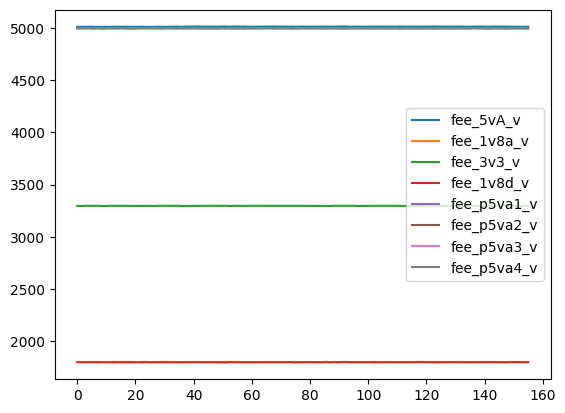

In [ ]:
plt.plot(hk_data.fee_5vA_v[:]*1.25)
plt.plot(hk_data.fee_1v8a_v[:]*1.25)
plt.plot(hk_data.fee_3v3_v[:]*1.25)
plt.plot(hk_data.fee_1v8d_v[:]*1.25)
plt.plot(hk_data.fee_p5va1_v[:]*1.25)
plt.plot(hk_data.fee_p5va2_v[:]*1.25)
plt.plot(hk_data.fee_p5va3_v[:]*1.25)
plt.plot(hk_data.fee_p5va4_v[:]*1.25)

plt.legend(['fee_5vA_v','fee_1v8a_v','fee_3v3_v','fee_1v8d_v','fee_p5va1_v','fee_p5va2_v','fee_p5va3_v','fee_p5va4_v'])
plt.show()

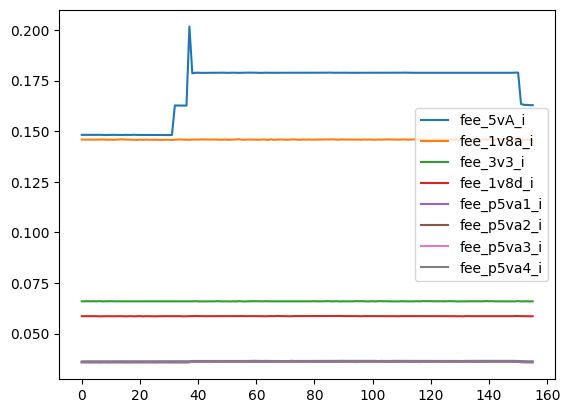

In [ ]:
plt.plot(hk_data.fee_5vA_i[:]*2.5/0.06/1e6)
plt.plot(hk_data.fee_1v8a_i[:]*2.5/0.06/1e6)
plt.plot(hk_data.fee_3v3_i[:]*2.5/0.06/1e6)
plt.plot(hk_data.fee_1v8d_i[:]*2.5/0.06/1e6)
plt.plot(hk_data.fee_p5va1_i[:]*2.5/0.06/1e6)
plt.plot(hk_data.fee_p5va2_i[:]*2.5/0.06/1e6)
plt.plot(hk_data.fee_p5va3_i[:]*2.5/0.06/1e6)
plt.plot(hk_data.fee_p5va4_i[:]*2.5/0.06/1e6)


plt.legend(['fee_5vA_i','fee_1v8a_i','fee_3v3_i','fee_1v8d_i','fee_p5va1_i','fee_p5va2_i','fee_p5va3_i','fee_p5va4_i'])
plt.show()

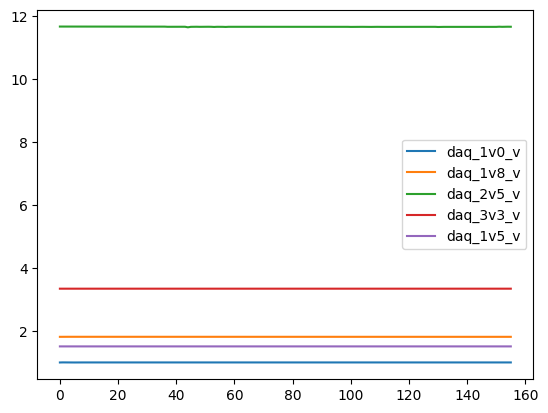

In [ ]:
plt.plot(hk_data.daq_1v0_v[:]*1.25/1000)
plt.plot(hk_data.daq_1v8_v[:]*1.25/1000)
plt.plot(hk_data.daq_2v5_v[:]*1.25/1000)
plt.plot(hk_data.daq_3v3_v[:]*1.25/1000)
plt.plot(hk_data.daq_1v5_v[:]*1.25/1000)
plt.legend(['daq_1v0_v','daq_1v8_v','daq_2v5_v','daq_3v3_v','daq_1v5_v'])
plt.show()

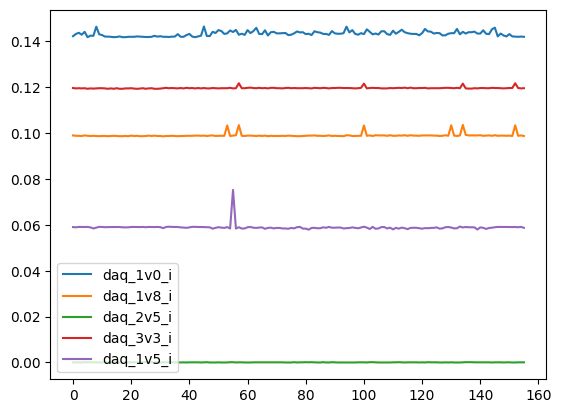

In [ ]:
plt.plot(hk_data.daq_1v0_i[:]*2.5/0.03/1e6)
plt.plot(hk_data.daq_1v8_i[:]*2.5/0.03/1e6)
plt.plot(hk_data.daq_2v5_i[:]*2.5/0.04/1e6)
plt.plot(hk_data.daq_3v3_i[:]*2.5/0.03/1e6)
plt.plot(hk_data.daq_1v5_i[:]*2.5/0.075/1e6)

plt.legend(['daq_1v0_i','daq_1v8_i','daq_2v5_i','daq_3v3_i','daq_1v5_i'])
plt.show()

In [ ]:
hk_data.keys()


dict_keys(['header', 'utc_time', 'cpu_temperature', 'daq_temperature_i2c1_0x49', 'latest_received_cmd', 'latest_received_cmd_arg', 'latest_received_cmd_index', 'current_cmd_progress', 'latest_complete_cmd', 'latest_complete_cmd_arg', 'latest_complete_cmd_exit', 'latest_complete_cmd_duration', 'file_upload_progress', 'file_upload_check', 'telemetry_count', 'cmd_count', 'storage_valid', 'memory_valid', 'pl_version', 'app_version', 'log_index', 'sci_data_index', 'data_stream_status', 'qspi_normal_or_backup', 'fee_z5v_v', 'fee_z5v_i', 'fee_z2v1_v', 'fee_z2v1_i', 'fee_z5v4_v', 'fee_z5v4_i', 'fee_z5vA_v', 'fee_z5vA_i', 'fee_5vA_v', 'fee_5vA_i', 'fee_1v8a_v', 'fee_1v8a_i', 'fee_3v3_v', 'fee_3v3_i', 'fee_1v8d_v', 'fee_1v8d_i', 'fee_p5va1_v', 'fee_p5va1_i', 'fee_p5va2_v', 'fee_p5va2_i', 'fee_p5va3_v', 'fee_p5va3_i', 'fee_p5va4_v', 'fee_p5va4_i', 'daq_1v0_v', 'daq_1v0_i', 'daq_1v8_v', 'daq_1v8_i', 'daq_2v5_v', 'daq_2v5_i', 'daq_3v3_v', 'daq_3v3_i', 'daq_1v5_v', 'daq_1v5_i', 'sipm_voltage0', 'sip

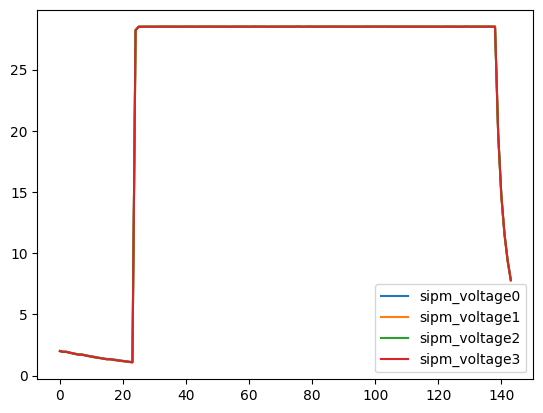

In [ ]:
plt.plot(hk_data.sipm_voltage0[:]/1000)
plt.plot(hk_data.sipm_voltage1[:]/1000)
plt.plot(hk_data.sipm_voltage2[:]/1000)
plt.plot(hk_data.sipm_voltage3[:]/1000)
plt.legend(['sipm_voltage0','sipm_voltage1','sipm_voltage2','sipm_voltage3'])
plt.show()

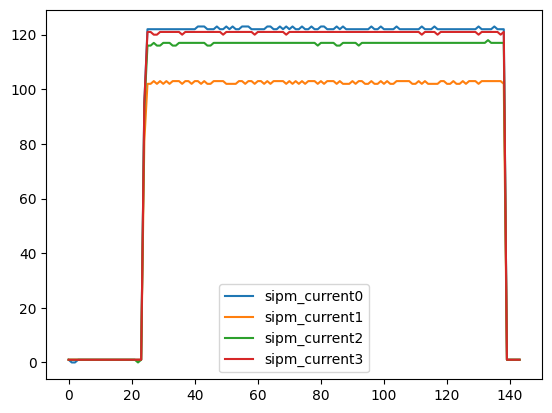

In [ ]:
plt.plot(hk_data.sipm_current0[:])
plt.plot(hk_data.sipm_current1[:])
plt.plot(hk_data.sipm_current2[:])
plt.plot(hk_data.sipm_current3[:])
plt.legend(['sipm_current0','sipm_current1','sipm_current2','sipm_current3'])
plt.show()

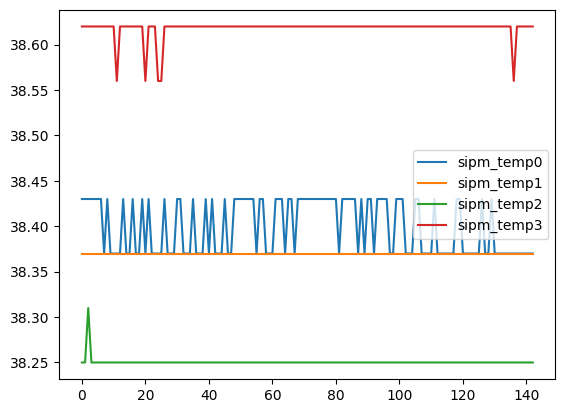

In [ ]:
plt.plot(hk_data.sipm_temp0[1:]/100 - 273.15)
plt.plot(hk_data.sipm_temp1[1:]/100 - 273.15)
plt.plot(hk_data.sipm_temp2[1:]/100 - 273.15)
plt.plot(hk_data.sipm_temp3[1:]/100 - 273.15)
plt.legend(['sipm_temp0','sipm_temp1','sipm_temp2','sipm_temp3'])
plt.show()


In [ ]:
hk_data.sipm_temp0[1]


31121

In [ ]:
hk_data.entered_saa_count

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint32)